良さげなサイト
https://toketarou.com/gamma_beta/
https://qiita.com/DeepTama/items/a60899b75ed45e19b0f1
https://web.sfc.keio.ac.jp/~maunz/BS14/BS14-06_GC.pdf

## ベイズ推定の共役事前分布について

ベイズ推定において、共役事前分布（Conjugate Prior Distribution）は、事後分布が事前分布と同じ種類の分布になる特別な事前分布です。共役事前分布を使用することで、事後分布の解析が容易になり、計算が簡単になるという利点があります。

### 基本的な概念

1. **ベイズの定理**:
   ベイズ推定はベイズの定理に基づいており、観測データからパラメータの事後分布を計算します。
   $$
   P(\theta | D) = \frac{P(D | \theta) P(\theta)}{P(D)}
   $$
   ここで、
   - $P(\theta | D)$ は事後分布（データ$D$が与えられたときのパラメータ$\theta$の確率分布）
   - $P(D | \theta)$ は尤度（$\theta$が与えられたときのデータ$D$の確率）
   - $P(\theta)$ は事前分布（データ$D$が与えられる前のパラメータ$\theta$の確率分布）
   - $P(D)$ は証拠（データ$D$の全確率）

2. **共役事前分布**:
   尤度関数と同じ種類の事前分布を選ぶと、事後分布も同じ種類の分布になります。このような事前分布を共役事前分布と呼びます。

### 共役事前分布の例

#### ベルヌーイ分布とベータ分布

ベルヌーイ分布の尤度関数に対して、共役事前分布はベータ分布です。

- **ベルヌーイ分布**:
  データ$X$がベルヌーイ分布に従うとき、成功確率$\theta$に対する尤度は次のようになります。
  $$
  P(X | \theta) = \theta^X (1 - \theta)^{1 - X}
  $$

- **ベータ事前分布**:
  事前分布をベータ分布として選択します。
  $$
  P(\theta) = \frac{\theta^{\alpha - 1} (1 - \theta)^{\beta - 1}}{B(\alpha, \beta)}
  $$
  ここで、$B(\alpha, \beta)$はベータ関数です。

- **事後分布**:
  観測データ$X$が$n$個あり、そのうち$k$個が成功（$X=1$）したとすると、事後分布もベータ分布になります。
  $$
  P(\theta | X) = \frac{\theta^{\alpha + k - 1} (1 - \theta)^{\beta + n - k - 1}}{B(\alpha + k, \beta + n - k)}
  $$

#### ポアソン分布とガンマ分布

ポアソン分布の尤度関数に対して、共役事前分布はガンマ分布です。

- **ポアソン分布**:
  データ$X$がポアソン分布に従うとき、平均$\lambda$に対する尤度は次のようになります。
  $$
  P(X | \lambda) = \frac{\lambda^X e^{-\lambda}}{X!}
  $$

- **ガンマ事前分布**:
  事前分布をガンマ分布として選択します。
  $$
  P(\lambda) = \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha - 1} e^{-\beta \lambda}
  $$
  ここで、$\Gamma(\alpha)$はガンマ関数です。

- **事後分布**:
  観測データ$X$の合計が$S$で、観測回数が$n$である場合、事後分布もガンマ分布になります。
  $$
  P(\lambda | X) = \frac{(\beta + n)^{\alpha + S}}{\Gamma(\alpha + S)} \lambda^{\alpha + S - 1} e^{-(\beta + n) \lambda}
  $$

### Pythonでの実装例

以下に、ベルヌーイ分布とベータ分布の共役事前分布を用いたベイズ推定の実装例を示します。

このコードは、ベータ分布を事前分布として、観測データに基づいて事後分布を計算し、両方の分布を可視化します。

### まとめ

- **共役事前分布**は、ベイズ推定において解析を簡単にするための特別な事前分布です。
- **例**として、ベルヌーイ分布とベータ分布、ポアソン分布とガンマ分布があります。
- **利点**として、計算が容易になり、事後分布の形が事前分布と同じになるため、解析が直感的になります。

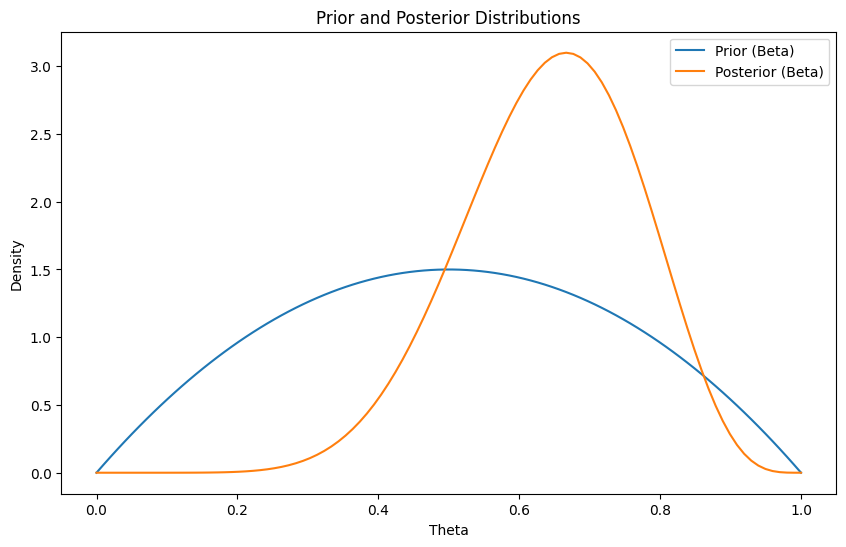

In [1]:

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 観測データ（1は成功、0は失敗）
data = np.array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1])

# 事前分布のパラメータ（ベータ分布のαとβ）
alpha_prior = 2
beta_prior = 2

# 観測データの成功数と失敗数
successes = np.sum(data)
failures = len(data) - successes

# 事後分布のパラメータ
alpha_posterior = alpha_prior + successes
beta_posterior = beta_prior + failures

# ベータ分布の描画
x = np.linspace(0, 1, 100)
prior = stats.beta(alpha_prior, beta_prior).pdf(x)
posterior = stats.beta(alpha_posterior, beta_posterior).pdf(x)

plt.figure(figsize=(10, 6))
plt.plot(x, prior, label='Prior (Beta)')
plt.plot(x, posterior, label='Posterior (Beta)')
plt.title('Prior and Posterior Distributions')
plt.xlabel('Theta')
plt.ylabel('Density')
plt.legend()
plt.show()

## MCMC法について

MCMC法（Markov Chain Monte Carlo method、マルコフ連鎖モンテカルロ法）は、複雑な確率分布からサンプルを生成するための手法です。特に、解析的に求めることが難しい事後分布や高次元の分布を扱う際に有効です。ベイズ推定や統計物理学、機械学習など、さまざまな分野で広く使用されています。

### 基本的な概念

MCMC法は以下の2つの主要なコンポーネントから成り立ちます。

1. **マルコフ連鎖（Markov Chain）**:
   - 次の状態が現在の状態にのみ依存する確率過程。つまり、未来の状態は現在の状態に依存し、過去の状態には依存しません。

2. **モンテカルロ法（Monte Carlo method）**:
   - 確率分布からランダムサンプリングを行い、数値計算を行う手法。

MCMC法は、マルコフ連鎖を用いてターゲットとなる分布からのサンプルを生成し、そのサンプルを用いてモンテカルロ法で解析を行います。

### 代表的なMCMCアルゴリズム

#### メトロポリス・ヘイスティングス法（Metropolis-Hastings Algorithm）

メトロポリス・ヘイスティングス法は、任意のターゲット分布からサンプリングするための基本的なMCMCアルゴリズムです。

1. **初期値の設定**: $X_0$ を初期値として設定します。
2. **候補点の生成**: 現在の値 $X_t$ から新しい候補点 $X'$ を生成します。この候補点は提案分布 $q(X'|X_t)$ に従います。
3. **受け入れ確率の計算**:
   - 受け入れ確率 $\alpha$ を次のように計算します。
     $$
     \alpha = \min \left( 1, \frac{P(X') q(X_t|X')}{P(X_t) q(X'|X_t)} \right)
     $$
   - ここで、$P(X)$ はターゲット分布、$q(X'|X_t)$ は提案分布の確率密度関数です。
4. **遷移の実行**: $\alpha$ に基づいて $X_{t+1}$ を次のように決定します。
   - 確率 $\alpha$ で $X_{t+1} = X'$ とする。
   - 確率 $1-\alpha$ で $X_{t+1} = X_t$ とする。
5. **繰り返し**: この手順を所定のステップ数だけ繰り返します。

#### ギブスサンプリング（Gibbs Sampling）

ギブスサンプリングは、各変数を順に条件付き分布からサンプリングする方法です。特に、各変数の条件付き分布が簡単にサンプリングできる場合に有効です。

1. **初期値の設定**: 各変数の初期値を設定します。
2. **各変数の更新**:
   - 他の変数を固定し、各変数をその条件付き分布から順にサンプリングします。
3. **繰り返し**: これを所定のステップ数だけ繰り返します。

### Pythonでの実装例

以下に、メトロポリス・ヘイスティングス法の簡単な実装例を示します。ここでは、標準正規分布からサンプルを生成します。



このコードは、標準正規分布をターゲット分布としてメトロポリス・ヘイスティングス法を用いてサンプリングし、その結果をプロットします。

### まとめ

- **MCMC法**は複雑な確率分布からサンプルを生成するための強力な手法です。
- **メトロポリス・ヘイスティングス法**や**ギブスサンプリング**など、さまざまなアルゴリズムが存在します。
- **Python**を用いた実装も比較的容易で、様々な分野で利用されています。

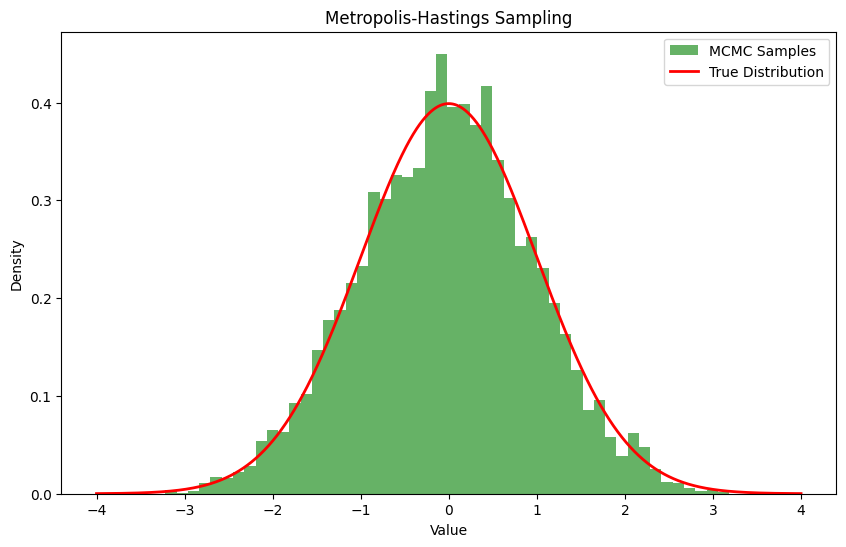

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ターゲット分布（標準正規分布）
def target_distribution(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

# メトロポリス・ヘイスティングス法
def metropolis_hastings(num_samples, proposal_width):
    samples = np.zeros(num_samples)
    current_sample = 0
    
    for i in range(num_samples):
        proposal = np.random.normal(current_sample, proposal_width)
        acceptance_ratio = target_distribution(proposal) / target_distribution(current_sample)
        
        if np.random.rand() < acceptance_ratio:
            current_sample = proposal
            
        samples[i] = current_sample
    
    return samples

# サンプリングの実行
num_samples = 10000
proposal_width = 1.0
samples = metropolis_hastings(num_samples, proposal_width)

# 結果のプロット
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g', label='MCMC Samples')
x = np.linspace(-4, 4, 1000)
plt.plot(x, target_distribution(x), 'r-', lw=2, label='True Distribution')
plt.title('Metropolis-Hastings Sampling')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

## メトロポリス・ヘイスティングス法の簡単な説明

メトロポリス・ヘイスティングス法は、複雑な確率分布からランダムにデータを取り出す方法です。この方法は、難しい問題を解くための便利なツールで、数学やコンピュータサイエンスでよく使われます。ここでは、中学生にもわかるように、メトロポリス・ヘイスティングス法の基本的なアイデアを説明します。

### ステップ1: 初めの点を決める

まず、ランダムに初めの点を決めます。この点を「$X_0$」と呼びます。この点がどこにあるかは、最初はあまり気にしなくても大丈夫です。

### ステップ2: 次の候補点を選ぶ

次に、今の点「$X_t$」から、次の点「$X'$」を選びます。この選び方は、適当な方法でランダムに決めます。たとえば、サイコロを振って決めるような感じです。

### ステップ3: 候補点を受け入れるかどうか決める

次に、新しく選んだ点「$X'$」を使うかどうかを決めます。このとき、以下のようにして決めます：

1. まず、「$X'$」がどれだけ良い点かを計算します（これを確率と呼びます）。
2. 次に、今の点「$X_t$」がどれだけ良い点かを計算します。
3. 「$X'$」の良さと「$X_t$」の良さを比べます。
4. 新しい点「$X'$」の方が良い点なら、必ず「$X'$」を選びます。
5. もし「$X'$」がそれほど良くない点なら、コインを投げるようにして「$X'$」を選ぶかどうかをランダムに決めます。

### ステップ4: 次の点を決める

もし「$X'$」を選んだなら、新しい点「$X_{t+1}$」は「$X'$」になります。もし「$X'$」を選ばなかったなら、新しい点「$X_{t+1}$」はそのまま「$X_t$」になります。

### ステップ5: これを繰り返す

このプロセスを何度も繰り返して、たくさんの点を集めます。これらの点が、最終的に求めたい確率分布に従うデータとなります。

### 例を使って説明

例えば、宝探しゲームを考えましょう。地図の上に隠されたお宝を探していますが、地図はとても広くて、どこにお宝があるかわかりません。でも、地図には「ここにはお宝があるかもしれない」というヒントが書いてあります。

1. **初めの点**: まず、地図のどこかに最初に立ちます。
2. **次の候補点**: 次に、どこに移動するかを決めます。近くのポイントをランダムに選びます。
3. **受け入れるかどうか**: 新しく選んだポイントのヒントが今の場所よりも良ければ、その場所に移動します。もしそれほど良くなければ、時々その場所に移動しますが、そうでなければ今の場所に留まります。
4. **繰り返す**: これを何度も繰り返すと、最終的にお宝がある場所に近づいていきます。

### Pythonでの簡単な実装例


このコードは、ある確率分布（ここでは標準正規分布）からサンプルを取り出すためのものです。結果をプロットすると、ランダムに生成された点がターゲット分布に従うことが確認できます。

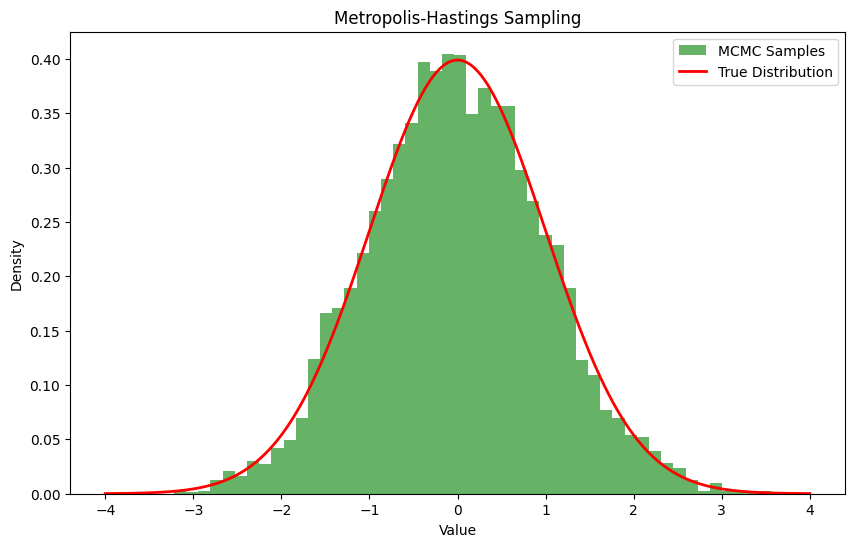

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ターゲットとなる分布（ここでは正規分布）
def target_distribution(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

# メトロポリス・ヘイスティングス法
def metropolis_hastings(num_samples, proposal_width):
    samples = np.zeros(num_samples)
    current_sample = 0
    
    for i in range(num_samples):
        proposal = np.random.normal(current_sample, proposal_width)
        acceptance_ratio = target_distribution(proposal) / target_distribution(current_sample)
        
        if np.random.rand() < acceptance_ratio:
            current_sample = proposal
            
        samples[i] = current_sample
    
    return samples

# サンプリングの実行
num_samples = 10000
proposal_width = 1.0
samples = metropolis_hastings(num_samples, proposal_width)

# 結果のプロット
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g', label='MCMC Samples')
x = np.linspace(-4, 4, 1000)
plt.plot(x, target_distribution(x), 'r-', lw=2, label='True Distribution')
plt.title('Metropolis-Hastings Sampling')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

## ギブスサンプリングについて

ギブスサンプリング（Gibbs Sampling）は、複雑な確率分布からデータを取り出すための方法で、特に複数の変数が関係している場合に便利です。ここでは、中学生にもわかるようにギブスサンプリングの基本的なアイデアを説明します。

### ギブスサンプリングの基本的なアイデア

ギブスサンプリングは、複数の変数がある場合に、それらの変数を順番に一つずつ更新していく方法です。それぞれの変数は、他の変数が固定された状態での条件付き分布に従って更新されます。

### ステップ1: 初めの値を設定する

まず、すべての変数の初めの値をランダムに決めます。例えば、変数が2つある場合、それぞれの変数$X$と$Y$に初めの値$X_0$と$Y_0$を設定します。

### ステップ2: 変数を順番に更新する

次に、変数を一つずつ更新します。他の変数が固定された状態で、条件付き分布に従って新しい値を選びます。

1. **$X$を更新する**:
   - $Y$が固定された状態で、$X$の新しい値を条件付き分布からサンプリングします。
   
2. **$Y$を更新する**:
   - 新しい$X$が決まったら、その値を使って$Y$の新しい値を条件付き分布からサンプリングします。

### ステップ3: 繰り返し

このプロセスを何度も繰り返すことで、最終的に求めたい分布に従うデータを得ることができます。

### 例を使って説明

例えば、クラスでみんなの身長と体重を調べたいとしましょう。でも、直接全員を調べるのは難しいので、サンプルを取りたいと考えます。

1. **初めの値を設定**:
   - 身長$X$と体重$Y$に初めの値を設定します。例えば、平均的な値を初めの値とします。

2. **身長を更新**:
   - 体重$Y$が決まった状態で、その体重に対する身長の分布から新しい身長$X$を選びます。

3. **体重を更新**:
   - 新しい身長$X$が決まった状態で、その身長に対する体重の分布から新しい体重$Y$を選びます。

4. **繰り返す**:
   - これを何度も繰り返すと、クラスのみんなの身長と体重の分布に近いサンプルを得ることができます。

### Pythonでの簡単な実装例

以下に、ギブスサンプリングを使って2つの変数$X$と$Y$をサンプリングする簡単なPythonコードの例を示します。


このコードは、2つの変数$X$と$Y$が正規分布に従う場合のギブスサンプリングを実行します。結果として、$X$と$Y$のサンプルがプロットされます。ギブスサンプリングを繰り返すことで、最終的に2つの変数の関係をよく表すデータが得られます。

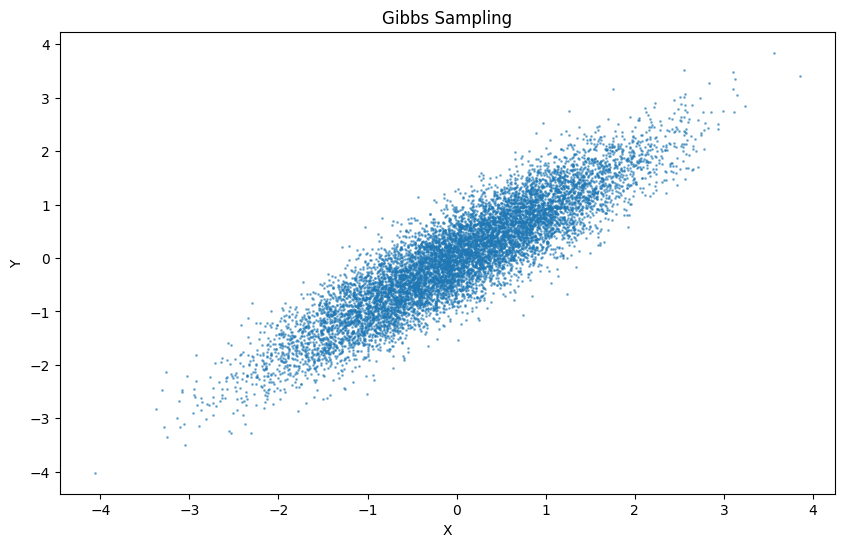

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 条件付き分布の例
def conditional_x(y, mu_x, sigma_x, rho):
    return np.random.normal(mu_x + rho * (y - mu_y) * sigma_x / sigma_y, np.sqrt(1 - rho**2) * sigma_x)

def conditional_y(x, mu_y, sigma_y, rho):
    return np.random.normal(mu_y + rho * (x - mu_x) * sigma_y / sigma_x, np.sqrt(1 - rho**2) * sigma_y)

# パラメータの設定
mu_x, mu_y = 0, 0
sigma_x, sigma_y = 1, 1
rho = 0.9
num_samples = 10000

# 初期値の設定
x = np.zeros(num_samples)
y = np.zeros(num_samples)
x[0], y[0] = np.random.normal(), np.random.normal()

# ギブスサンプリングの実行
for i in range(1, num_samples):
    x[i] = conditional_x(y[i-1], mu_x, sigma_x, rho)
    y[i] = conditional_y(x[i], mu_y, sigma_y, rho)

# 結果のプロット
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', markersize=1, alpha=0.5)
plt.title('Gibbs Sampling')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()